In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sbn
from scipy import stats
from weather import city_list, weather_analysis, w_stats

In [3]:
# To generate a new set of cities, uncomment the line below and run
city_list()

The random array of coordinates resulted in a list of 644 valid cities.
Breaking up the list of cities into 12 sets for processing.
[[0, 54], [54, 108], [108, 162], [162, 216], [216, 270], [270, 324], [324, 378], [378, 432], [432, 486], [486, 540], [540, 594], [594, 644]]
Do you wish to proceed with the download? (Y/N): Y
Your data will be in ./data/out_20190113-164550.csv and all calls will be logged in ./log/log_20190113-164550.txt
Getting data for set number 0: innisfail... 
Success!

Getting data for set number 0: churapcha... 
Success!

Getting data for set number 0: odiongan... 
Success!

Getting data for set number 0: luanda... 
Success!

Getting data for set number 0: kavieng... 
Success!

Getting data for set number 0: westport... 
Success!

Getting data for set number 0: mengyin... 
Success!

Getting data for set number 0: avarua... 
Success!

Getting data for set number 0: albany... 
Success!

Getting data for set number 0: rikitea... 
Success!

Getting data for set number 0

Success!

Getting data for set number 2: havre-saint-pierre... 
Success!

Getting data for set number 2: hithadhoo... 
Success!

Getting data for set number 2: auki... 
Success!

Getting data for set number 2: umzimvubu... 
City not found

Getting data for set number 2: saint-augustin... 
Success!

Getting data for set number 2: saint-georges... 
Success!

Getting data for set number 2: hasaki... 
Success!

Getting data for set number 2: brae... 
Success!

Getting data for set number 2: tual... 
Success!

Getting data for set number 2: caruray... 
Success!

Getting data for set number 2: nikolskoye... 
Success!

Getting data for set number 2: broken hill... 
Success!

Getting data for set number 2: redmond... 
Success!

Getting data for set number 2: puerto escondido... 
Success!

Getting data for set number 2: jujuy... 
City not found

Getting data for set number 2: barreirinhas... 
Success!

Getting data for set number 2: mutsu... 
Success!

Getting data for set number 2: lagoa... 
S

Success!

Getting data for set number 5: dunedin... 
Success!

Getting data for set number 5: padang... 
Success!

Getting data for set number 5: harrison... 
Success!

Getting data for set number 5: karaul... 
City not found

Getting data for set number 5: chara... 
Success!

Getting data for set number 5: warmbad... 
Success!

Getting data for set number 5: krasnyy chikoy... 
Success!

Getting data for set number 5: hailar... 
Success!

Getting data for set number 5: salalah... 
Success!

Getting data for set number 5: ituni... 
City not found

Getting data for set number 5: laguna... 
Success!

Getting data for set number 5: male... 
Success!

Getting data for set number 5: jalu... 
Success!

Getting data for set number 5: kaitangata... 
Success!

Getting data for set number 5: campbellsville... 
Success!

Getting data for set number 5: tuy hoa... 
Success!

Getting data for set number 5: port macquarie... 
Success!

Getting data for set number 5: hulyaypole... 
Success!

Getting da

Success!

Getting data for set number 8: nakamura... 
Success!

Getting data for set number 8: pyay... 
Success!

Getting data for set number 8: trincomalee... 
Success!

Getting data for set number 8: almaznyy... 
Success!

Getting data for set number 8: merauke... 
Success!

Getting data for set number 8: ust-kulom... 
Success!

Getting data for set number 8: kontagora... 
Success!

Getting data for set number 8: terrak... 
Success!

Getting data for set number 8: den helder... 
Success!

Getting data for set number 8: yanam... 
Success!

Getting data for set number 8: elko... 
Success!

Getting data for set number 8: podyuga... 
Success!

Getting data for set number 8: korla... 
City not found

Getting data for set number 8: sharya... 
Success!

Getting data for set number 8: bardiyah... 
City not found

Getting data for set number 8: fort nelson... 
Success!

Getting data for set number 8: marcona... 
City not found

Getting data for set number 8: gurskoye... 
City not found

Getti

Success!

Getting data for set number 10: tawnat... 
City not found

Getting data for set number 10: sabang... 
Success!

Getting data for set number 10: flinders... 
Success!

Getting data for set number 10: mehran... 
Success!

Getting data for set number 11: ossora... 
Success!

Getting data for set number 11: katsuura... 
Success!

Getting data for set number 11: gobabis... 
Success!

Getting data for set number 11: muros... 
Success!

Getting data for set number 11: toppenish... 
Success!

Getting data for set number 11: puerto madryn... 
Success!

Getting data for set number 11: tashtyp... 
Success!

Getting data for set number 11: canoinhas... 
Success!

Getting data for set number 11: trenggalek... 
Success!

Getting data for set number 11: norsup... 
Success!

Getting data for set number 11: shamary... 
Success!

Getting data for set number 11: vigrestad... 
Success!

Getting data for set number 11: kaeng khoi... 
Success!

Getting data for set number 11: zlatoustovsk... 
City

In [12]:
weather_data = weather_analysis('./data/out_20190108-145516.csv')

Getting a dataframe from the file ./data/out_20190108-145516.csv...


In [13]:
# Convert the Date (data retrieval) from Epoch to readable time
weather_data['Date(GMT)'] = pd.to_datetime(weather_data['Date'], unit='s').dt.strftime('%m-%d-%Y: %H:%M')
adate = weather_data['Date(GMT)'][0] + ' GMT'
# For statistical analysis, we will consider absolute latitude
weather_data['Absolute Latitude'] = abs(weather_data['Lat'])

weather_data.head()

,City,Humidity,Min Temp,Max Temp,Wind Speed,Cloudiness,Date,Country,Sunrise,Sunset,Lat,Lon,Daytime,Date(GMT),Absolute Latitude
0,Rikitea,95,27.02,27.02,7.09,32,1546977317,PF,1546957375,1547005851,-23.12,-134.97,Day,01-08-2019: 19:55,23.12
1,Mataura,65,16.49,16.49,2.02,64,1546977317,NZ,1546880669,1546936656,-46.19,168.86,Night,01-08-2019: 19:55,46.19
2,Bulalacao,100,24.07,24.07,4.22,92,1546977317,PH,1546899041,1546939963,13.70,123.78,Night,01-08-2019: 19:55,13.70
3,Thompson,70,-17.00,-17.00,7.70,90,1546974000,CA,1546959420,1546986019,55.74,-97.86,Day,01-08-2019: 19:00,55.74
4,Polyarnyye Zori,87,-10.49,-10.49,1.24,88,1546977317,RU,1546936443,1546946414,67.37,32.50,Night,01-08-2019: 19:55,67.37


### Testing the distribution of the random cities by plotting latitude/longitude

* Is the distribution of cities even across a range of coordinates (on land masses)?
- Plot out the latitude/longitude of the random sample using Citipy
- While the density of the Citipy sample does not reflect population density, it gives a nice spread across land masses.
** Density can be seen when plotting a random sample of the OWM city (JSON libarary) coordinates

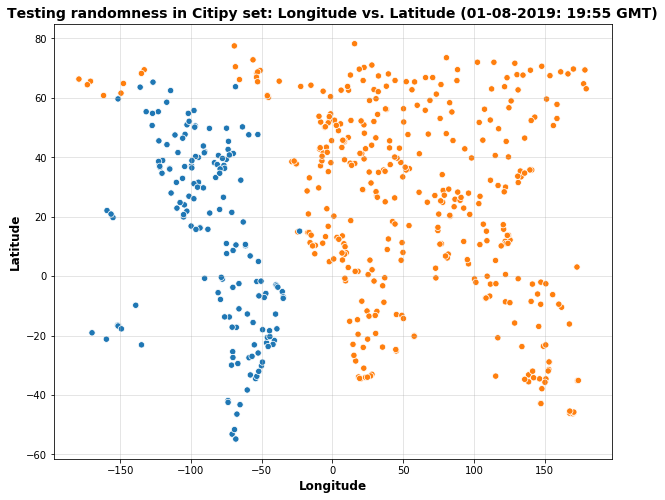

In [16]:
sbn.scatterplot(data=weather_data, x='Lon', y='Lat', hue='Daytime', legend=False, s=40)
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.ylimit=(-60,45)
fig.xlimit=(-65,85)
plt.grid(alpha=0.4)
plt.xlabel('Longitude', fontsize=12, fontweight='bold')
plt.ylabel('Latitude', fontsize=12, fontweight='bold')
plt.title(f"Testing randomness in Citipy set: Longitude vs. Latitude ({adate})", fontsize=14, fontweight='bold')
plt.savefig('./graphics/Citipy randomness test')

## Temperature vs. Latitude

- Temperature has an inverse relationship to the absolute value of the latitude
- This demonstrates that temperatures do rise as you near the equator
- There is a different slope to the relationship for temperatures measured during the day and night
- P-values are significant in all three measures - combined, daytime and nighttime
- When plotting temperature vs. actual latitude, it is apparent that the Northern Hemisphere is much 
colder than Southern Hemisphere - probably because it\'s winter.

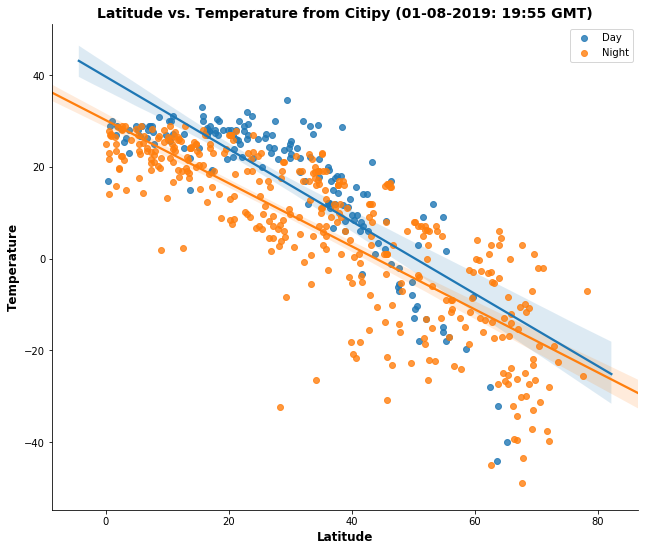

In [17]:
sbn.lmplot(data=weather_data, x='Absolute Latitude', y='Max Temp', hue='Daytime', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.ylimit=(-60,45)
fig.xlimit=(-65,85)
plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Temperature', fontsize=12, fontweight='bold')
plt.title(f"Latitude vs. Temperature from Citipy ({adate})", fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.savefig('./data/Citipy_temp_abslat.png')

In [18]:
# get coeffs of linear fit for the full dataset
w_stats(weather_data['Absolute Latitude'], weather_data['Max Temp'])

'Slope: -0.7284851639522768. Intercept: 33.529112871405985. R: -0.8178606352436938. P: 1.6404359827836822e-130. SE: 0.022158824429184654'

In [19]:
# get coeffs of linear fit for cities that were in nighttime when data was collected
night_df = weather_data.loc[weather_data.Daytime=='Night',:]
w_stats(night_df['Absolute Latitude'], night_df['Max Temp'])

'Slope: -0.6871893259588382. Intercept: 30.158979765017527. R: -0.8190606930876866. P: 1.5034387987702818e-91. SE: 0.024989836901478713'

In [20]:
# get coeffs of linear fit for cities that were in daytime when data was collected
day_df = weather_data.loc[weather_data.Daytime=='Day',:]
w_stats(day_df['Absolute Latitude'], day_df['Max Temp'])

'Slope: -0.7883130639315695. Intercept: 39.625695046399755. R: -0.8230421073141269. P: 1.2073570005166332e-41. SE: 0.042741767812985054'

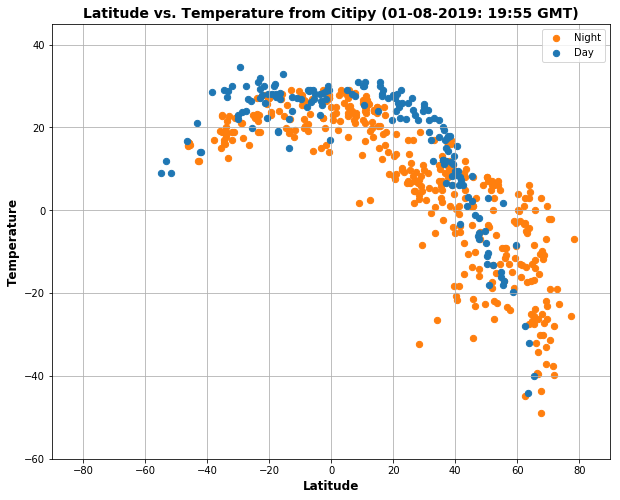

In [21]:
fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'ylim':(-60,45), 'xlim':(-90,90)})
night_df.plot(ax=ax, kind="scatter", x='Lat', y='Max Temp', s=40, color="tab:orange", edgecolor='tab:orange', label='Night')
day_df.plot(ax=ax, kind="scatter", grid=True, x='Lat', y='Max Temp', s=40, color="tab:blue", edgecolors="tab:blue", label='Day')

plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Temperature', fontsize=12, fontweight='bold')
plt.title(f"Latitude vs. Temperature from Citipy ({adate})", fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.savefig('./data/Citipy_temp_lat.png')

## Humidity vs. Latitude

- The dataset had one outlier where humidity was greater than 100 percent, so that was removed
- The relationship between humidity and latitude was not significant for the whole dataset.
- However, there was a significant increase in humidity in cities nearer to the equator at night (P=1.95e-08).
- That increase was not reflected in subsequent runs and could have been the result of a specific weather pattern.
- There was no significant difference in humidity in cities based on latitude during the day .

In [22]:
#Removing one outlier that had a humidity of 300%
weather_data_f = weather_data[np.abs(weather_data.Humidity-weather_data.Humidity.mean()) <= (3*weather_data.Humidity.std())]


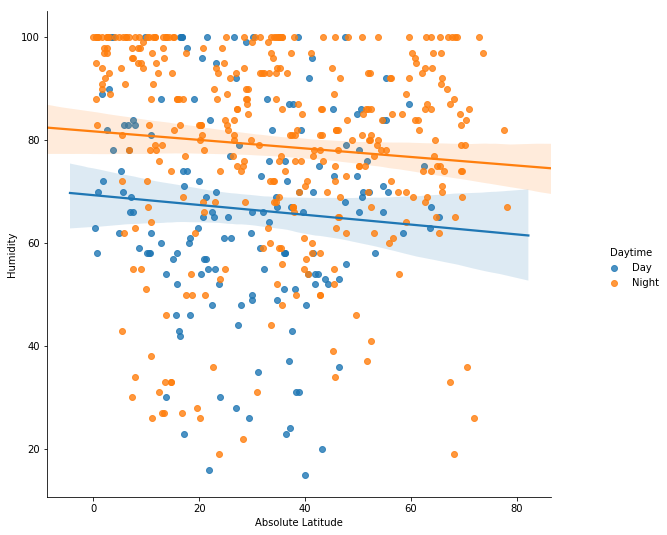

In [23]:
# Looking at the seaborn plot you can see a trend in the nighttime samples... sort of.
sbn.lmplot(data=weather_data_f, x='Absolute Latitude', y='Humidity', hue='Daytime', legend=True)
fig = plt.gcf()
fig.set_size_inches(10, 8)

In [24]:
#Removing one outlier that had a humidity of 300%
day_df = day_df[np.abs(day_df.Humidity-day_df.Humidity.mean()) <= (3*day_df.Humidity.std())]


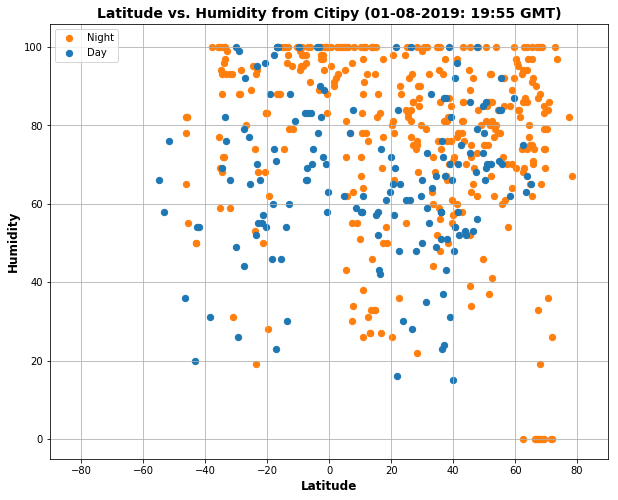

In [25]:
fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'xlim':(-90,90), 'xlim':(-90,90)})
night_df.plot(ax=ax, kind="scatter", x='Lat', y='Humidity', s=40, color="tab:orange", edgecolor='tab:orange', label='Night')
day_df.plot(ax=ax, kind="scatter", grid=True, x='Lat', y='Humidity', s=40, color="tab:blue", edgecolors="tab:blue", label='Day')

plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Humidity', fontsize=12, fontweight='bold')
plt.title(f"Latitude vs. Humidity from Citipy ({adate})", fontsize=14, fontweight='bold')
plt.legend(loc='best')

# plt.legend(loc='best')
plt.savefig('./data/Citipy_humid_lat.png')

#### Cloudiness Plot
- We could find no apparent relationship between cloudiness and latitude or longitude in the dataset in other plots.
- This plot shows the clusters of cloudy regions based on latitude and longitude.
- At the time of data collection, it was cloudy in portions of Canada, South America, Northern Europe
- At the time of data collection it was largely clear across the equator.

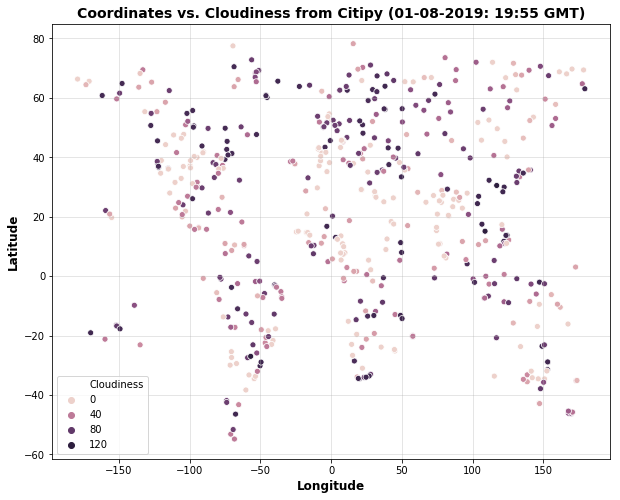

In [26]:
sbn.scatterplot(data=weather_data, x='Lon', y='Lat', hue='Cloudiness')
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.ylimit=(-60,45)
fig.xlimit=(-65,85)

plt.grid(alpha=0.4)
plt.xlabel('Longitude', fontsize=12, fontweight='bold')
plt.ylabel('Latitude', fontsize=12, fontweight='bold')

plt.legend(loc='best')
plt.title(f"Coordinates vs. Cloudiness from Citipy ({adate})", fontsize=14, fontweight='bold')
# plt.legend(loc='best')
plt.savefig('./data/Citipy_cloud_coord.png')

#### Latitude vs. Wind Speed Plot
- There was no direct relationship between latitude or longitude and wind
- There was a cluster of windiness in Northern Europe and South America.

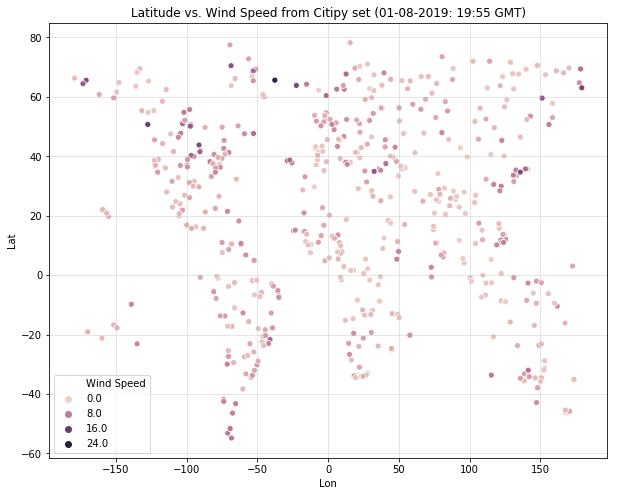

In [27]:
sbn.scatterplot(data=weather_data, x='Lon', y='Lat', hue='Wind Speed', legend='brief')
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.ylimit=(-60,45)
fig.xlimit=(-65,85)
plt.grid(alpha=0.4)
plt.title(f"Latitude vs. Wind Speed from Citipy set ({adate})")
# plt.legend(loc='best')
plt.savefig('./data/Citipy_wind_coord.png')